In [2]:
# 구글 코랩 한글 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,271 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/k_digital/colaboratory

Mounted at /content/drive
/content/drive/MyDrive/k_digital/colaboratory


In [2]:
# jpype 설치
!pip install -U "jpype1<1.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 23.2 MB/s eta 0:00:00


In [ ]:
# 한글을 사용하기 위해 세종사전을 이용
!pip install konlpy 
!pip install wordcloud

In [4]:
## 기본
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


### 데이터 가져오기

In [5]:
df = pd.read_csv('./data/project/hotel_exlabel2.csv',encoding='cp949')
hotels = list(df['Hotel'])
content = list(df['Content'])
df.head()

,User_Id,Gender,Age,Hotel,Rating,Content
0,동채야채,M,35,호텔 크레센도 서울,10,논현 1인 출장 쾌적하고 적절한 가격대 호텔. 서비스한 서비스 편의점 맥도날드 인근...
1,소수서원,F,26,호텔 크레센도 서울,10,공간은 좁지만 시설과 비품은 깨끗하고 좋았으며 서비스분이 서비스하셨다. 시설 수압이...
2,대륙적인기관차,M,40,호텔 크레센도 서울,10,시설 매트리스가 구부러져서 허리 아픔. 가격은 저렴하고 좋은 편인데 매트리스 교체 필요.
3,융뀨웅,F,36,호텔 크레센도 서울,10,깔끔하고 좋았지만 실내가 건조하고 겨울 가운이어서 계절감이 안맞았습니다.
4,자연스러운직물,F,25,호텔 크레센도 서울,10,조용하고 환기가능


In [34]:
# 각 호텔별 명사를 담은 딕셔너리 만들기

noun_dict = {
  '강남 스테이호텔':['청결','서비스','가격','위치','시설','방음'],
  '그랜드 인터컨티넨탈 서울 파르나스': ['청결','서비스','가격','위치','시설','방음'],
  '글래드 강남 코엑스센터': ['청결','서비스','가격','위치','시설','방음'],
  '노보텔 앰배서더 서울 강남' : ['청결','서비스','가격','위치','시설','방음'],
  '더 디자이너스 리즈 강남 프리미어' : ['청결','서비스','가격','위치','시설','방음'],
  '데미안 호텔' : ['청결','서비스','가격','위치','시설','방음'],
  '도미인 서울강남' : ['청결','서비스','가격','위치','시설','방음'],
  '라까사호텔 서울': ['청결','서비스','가격','위치','시설','방음'],
  '라비타호텔': ['청결','서비스','가격','위치','시설','방음'],
  '렉스관광호텔': ['청결','서비스','가격','위치','시설','방음'],
  '마리호텔': ['청결','서비스','가격','위치','시설','방음'],
  '베니키아 강남 노블레스': ['청결','서비스','가격','위치','시설','방음'],
  '베스트웨스턴 프리미어 강남 호텔': ['청결','서비스','가격','위치','시설','방음'],
  '보코서울강남, IHG 호텔': ['청결','서비스','가격','위치','시설','방음'],
  '사월 호텔': ['청결','서비스','가격','위치','시설','방음'],
  '삼정호텔': ['청결','서비스','가격','위치','시설','방음'],
  '신라스테이 삼성': ['청결','서비스','가격','위치','시설','방음'],
  '신라스테이 역삼': ['청결','서비스','가격','위치','시설','방음'],
  '안다즈 서울 강남': ['청결','서비스','가격','위치','시설','방음'],
  '알로프트 서울 강남': ['청결','서비스','가격','위치','시설','방음'],
  '에이든 바이베스트웨스턴 청담': ['청결','서비스','가격','위치','시설','방음'],
  'AC 호텔 바이 메리어트 서울 강남': ['청결','서비스','가격','위치','시설','방음'],
  'H 에비뉴 호텔 역삼점': ['청결','서비스','가격','위치','시설','방음'],
  '엘리에나 호텔': ['청결','서비스','가격','위치','시설','방음'],
  'L7 강남 바이 롯데': ['청결','서비스','가격','위치','시설','방음'],
  '역삼 아르누보씨티 호텔앤레지던스': ['청결','서비스','가격','위치','시설','방음'],
  '역삼 트리아호텔': ['청결','서비스','가격','위치','시설','방음'],
  '역삼 프리미어호텔 XYM': ['청결','서비스','가격','위치','시설','방음'],
  '오월호텔': ['청결','서비스','가격','위치','시설','방음'],
  '오크우드 프리미어 코엑스센터': ['청결','서비스','가격','위치','시설','방음'],
  '이비스 스타일 앰배서더 강남': ['청결','서비스','가격','위치','시설','방음'],
  '인더시티 비즈니스': ['청결','서비스','가격','위치','시설','방음'],
  '인터컨티넨탈 서울 코엑스': ['청결','서비스','가격','위치','시설','방음'],
  '제리스 플래닛': ['청결','서비스','가격','위치','시설','방음'],
  '조선 팰리스 서울 강남 럭셔리 컬렉션': ['청결','서비스','가격','위치','시설','방음'],
  '파크 하얏트 서울': ['청결','서비스','가격','위치','시설','방음'],
  '파티오세븐 호텔': ['청결','서비스','가격','위치','시설','방음'],
  '포포인츠 바이 쉐라톤 서울 강남': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 그라모스': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 데님': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 리베라': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 선샤인 서울': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 세느': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 아노블리': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 안테룸 서울': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 엔트라 강남': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 유리앤': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 인 나인 강남': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 카파스': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 카푸치노': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 컬리넌 개포': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 크레센도 서울': ['청결','서비스','가격','위치','시설','방음'],
  '호텔 페이토 삼성': ['청결','서비스','가격','위치','시설','방음'],
  '호텔뉴브': ['청결','서비스','가격','위치','시설','방음'],
  '호텔스타 강남' : ['청결','서비스','가격','위치','시설','방음']

}


In [61]:
hotel_nouns_dict = {
  '호텔 크레센도 서울': {'청결': 0, '서비스': 4, '가격': 0, '위치': 0,  '시설': 0, '방음': 0},
  '글래드 강남 코엑스센터' : {'청결': 1, '서비스': 10, '가격': 2, '위치': 10,  '시설': 2, '방음': 2},
  '호텔 리베라' : {'청결': 3, '서비스': 9, '가격': 3, '위치': 5, '시설': 7,  '방음': 1},
  'AC 호텔 바이 메리어트 서울 강남' : {'청결': 7,  '서비스': 16, '가격': 0, '위치': 4,  '시설': 7, '방음': 0},
  'H 에비뉴 호텔 역삼점' : {'청결': 1, '서비스': 2, '가격': 0, '위치': 1, '시설': 0, '방음': 1 },
  'L7 강남 바이 롯데' : {'청결': 18, '서비스': 27, '가격': 1,  '위치': 12, '시설': 4, '방음': 0 },
  '강남 스테이호텔' : {'청결': 4, '서비스': 16, '가격': 0, '위치': 4, '시설': 4, '방음': 0  },
  '그랜드 인터컨티넨탈 서울 파르나스' : {'청결': 12, '서비스': 24, '가격': 1, '위치': 9, '시설': 15, '방음': 1 },
  '노보텔 앰배서더 서울 강남' : {'청결': 3, '서비스': 14, '가격': 3, '위치': 5, '시설': 4, '방음': 0 },
  '더 디자이너스 리즈 강남 프리미어' : {'청결': 12, '서비스': 12, '가격': 1, '위치': 5, '시설': 8, '방음': 3 },
  '데미안 호텔' :{'청결': 0, '서비스': 2, '가격': 2, '위치': 2, '시설': 2, '방음': 0 },
  '도미인 서울강남' :{'청결': 7, '서비스': 11, '가격': 1, '위치': 6, '시설': 7, '방음': 1 },
  '라까사호텔 서울' :{'청결': 5, '서비스': 12, '가격': 3, '위치': 5, '시설': 3, '방음': 0 },
  '라비타호텔' : {'청결': 4, '서비스': 5, '가격': 0, '위치': 1, '시설': 4, '방음': 0 },
  '렉스관광호텔' :{'청결': 0, '서비스': 6, '가격': 0, '위치': 0, '시설': 0, '방음': 0 },
  '마리호텔' : {'청결': 2, '서비스': 3, '가격': 2, '위치': 4, '시설': 5, '방음': 0 },
  '베니키아 강남 노블레스' : {'청결': 5, '서비스': 5, '가격': 3, '위치': 4, '시설': 7, '방음': 0 },
  '베스트웨스턴 프리미어 강남 호텔' : {'청결': 3, '서비스': 9, '가격': 0, '위치': 6, '시설': 2, '방음': 1 },
  '보코서울강남, IHG 호텔' :{'청결': 7, '서비스': 14, '가격': 1, '위치': 7, '시설': 3, '방음': 1 },
  '사월 호텔' :{'청결': 18, '서비스': 11, '가격': 1, '위치': 4, '시설': 18, '방음': 2 },
  '삼정호텔' : {'청결': 7, '서비스': 18, '가격': 1, '위치': 7, '시설': 5, '방음': 3 },
  '신라스테이 삼성' :{'청결': 3, '서비스': 9, '가격': 0, '위치': 4, '시설': 6, '방음': 1 },
  '신라스테이 역삼' : {'청결': 13, '서비스': 16, '가격': 4, '위치': 6, '시설': 7, '방음': 3 },
  '안다즈 서울 강남' :{'청결': 8, '서비스': 19, '가격': 0, '위치': 4, '시설': 8, '방음': 1 },
  '알로프트 서울 강남' : {'청결': 3, '서비스': 11, '가격': 0, '위치': 5, '시설': 2, '방음': 0 },
  '에이든 바이베스트웨스턴 청담' :{'청결': 6, '서비스': 12, '가격': 1, '위치': 7, '시설': 3, '방음': 0 },
  '엘리에나 호텔' : {'청결': 1, '서비스': 0, '가격': 0, '위치': 0, '시설': 2, '방음': 0 },
  '호텔 엔트라 강남' : {'청결': 3, '서비스': 8, '가격': 1, '위치': 3, '시설': 4, '방음': 1 },
  '호텔 유리앤': {'청결': 6, '서비스': 10, '가격': 1, '위치': 8, '시설': 2, '방음': 0},                       
  '호텔 인 나인 강남': {'청결': 8, '서비스': 7, '가격': 3, '위치': 11, '시설': 3, '방음': 2},                
  '호텔 카파스': {'청결': 7, '서비스': 9, '가격': 1, '위치': 1, '시설': 6, '방음': 0},                        
  '호텔 카푸치노': {'청결': 5, '서비스': 11, '가격': 2, '위치': 6, '시설': 10, '방음': 0},                     
  '호텔 컬리넌 개포': {'청결': 6, '서비스': 3, '가격': 0, '위치': 5, '시설': 4, '방음': 1},                   
  '호텔 페이토 삼성': {'청결': 8, '서비스': 10, '가격': 1, '위치': 14, '시설': 4, '방음': 1},                  
  '호텔뉴브': {'청결': 5, '서비스': 14, '가격': 4, '위치': 9, '시설': 5, '방음': 0},                            
  '호텔스타 강남': {'청결': 4, '서비스': 11, '가격': 8, '위치': 7, '시설': 7, '방음': 0},                        
  '역삼 아르누보씨티 호텔앤레지던스': {'청결': 1, '서비스': 0, '가격': 0, '위치': 1, '시설': 1, '방음': 0},      
  '역삼 트리아호텔': {'청결': 2, '서비스': 0, '가격': 0, '위치': 3, '시설': 3, '방음': 0},                          
  '역삼 프리미어호텔 XYM': {'청결': 10, '서비스': 7, '가격': 3, '위치': 4, '시설': 5, '방음': 0},              
  '오월호텔': {'청결': 9, '서비스': 5, '가격': 0, '위치': 6, '시설': 8 ,'방음': 0 },                         
  '오크우드 프리미어 코엑스센터': {'청결': 10, '서비스': 15, '가격': 3, '위치': 12, '시설': 3, '방음': 0},            
  '이비스 스타일 앰배서더 강남': {'청결': 3, '서비스': 9, '가격': 2, '위치': 5, '시설': 2, '방음': 0},           
  '인더시티 비즈니스': {'청결': 4, '서비스': 1, '가격': 3, '위치': 3, '시설': 3, '방음': 3},                  
  '인터컨티넨탈 서울 코엑스': {'청결': 4, '서비스': 22, '가격': 0, '위치': 8, '시설': 5, '방음': 0},                
  '제리스 플래닛': {'청결': 1, '서비스': 1, '가격': 0, '위치': 3, '시설': 5, '방음': 0},                         
  '조선 팰리스 서울 강남 럭셔리 컬렉션': {'청결': 7, '서비스': 25, '가격': 1, '위치': 0, '시설': 5, '방음': 0},             
  '파크 하얏트 서울': {'청결': 3, '서비스': 14, '가격': 1, '위치': 4, '시설': 7, '방음': 0},                     
  '파티오세븐 호텔': {'청결': 5, '서비스': 1, '가격': 1, '위치': 3, '시설': 9, '방음': 4},                     
  '포포인츠 바이 쉐라톤 서울 강남': {'청결': 3, '서비스': 14, '가격': 1, '위치': 1, '시설': 2, '방음': 1},            
  '호텔 그라모스': {'청결': 7, '서비스': 8, '가격': 3, '위치': 1, '시설': 4, '방음': 0},                           
  '호텔 데님': {'청결': 1, '서비스': 4, '가격': 0, '위치': 2, '시설': 1, '방음': 2},                               
  '호텔 선샤인 서울': {'청결': 3, '서비스': 5, '가격': 2, '위치': 4, '시설': 2, '방음': 0},                  
  '호텔 세느': {'청결': 8, '서비스': 11, '가격': 0, '위치': 6, '시설': 7, '방음': 1},                         
  '호텔 아노블리': {'청결': 0, '서비스': 3, '가격': 0, '위치': 3, '시설': 1, '방음': 0},                      
  '호텔 안테룸 서울': {'청결': 4, '서비스': 9, '가격': 0, '위치': 12, '시설': 1, '방음': 1}


}

In [62]:
### 각 호텔별로 딕셔너리 값의 빈도수를 추출

from konlpy.tag import Komoran
from collections import defaultdict

# Komoran 객체 생성
komoran = Komoran()

# 호텔 별 명사 빈도수를 저장할 딕셔너리 생성
hotel_nouns_dict = {}
for hotel in hotels:
    hotel_nouns_dict[hotel] = defaultdict(int)

# 댓글에서 명사 추출하여 빈도수 계산
for i in range(len(content)):
    nouns = komoran.nouns(content[i])
    hotel = hotels[i]
    for noun in nouns:
        if noun in noun_dict.get(hotel, []):
          hotel_nouns_dict[hotel][noun] += 1

# 결과 출력
for hotel in hotel_nouns_dict:
    print(hotel)
    print(hotel_nouns_dict[hotel])

호텔 크레센도 서울
defaultdict(<class 'int'>, {'가격': 2, '서비스': 4, '위치': 2, '시설': 3})
글래드 강남 코엑스센터
defaultdict(<class 'int'>, {'서비스': 10, '가격': 2, '위치': 10, '청결': 1, '시설': 2, '방음': 2})
호텔 리베라
defaultdict(<class 'int'>, {'청결': 3, '가격': 3, '위치': 5, '시설': 7, '서비스': 9, '방음': 1})
AC 호텔 바이 메리어트 서울 강남
defaultdict(<class 'int'>, {'위치': 4, '서비스': 16, '청결': 7, '시설': 7})
H 에비뉴 호텔 역삼점
defaultdict(<class 'int'>, {'청결': 1, '위치': 1, '방음': 1, '서비스': 2})
L7 강남 바이 롯데
defaultdict(<class 'int'>, {'청결': 18, '서비스': 27, '위치': 12, '시설': 4, '가격': 1})
강남 스테이호텔
defaultdict(<class 'int'>, {'시설': 4, '서비스': 16, '청결': 4, '위치': 4})
그랜드 인터컨티넨탈 서울 파르나스
defaultdict(<class 'int'>, {'서비스': 24, '청결': 12, '위치': 9, '시설': 15, '방음': 1, '가격': 1})
노보텔 앰배서더 서울 강남
defaultdict(<class 'int'>, {'서비스': 14, '가격': 3, '청결': 3, '위치': 5, '시설': 4})
더 디자이너스 리즈 강남 프리미어
defaultdict(<class 'int'>, {'위치': 5, '청결': 12, '시설': 8, '방음': 3, '서비스': 12, '가격': 1})
데미안 호텔
defaultdict(<class 'int'>, {'위치': 2, '서비스': 2, '시설': 2, '가격': 2})
도미인 서울강남
defaultdict(<clas

In [63]:
# 정해진 명사 순서 리스트
word_list = ['청결', '서비스', '가격', '위치', '시설', '방음']

# hotel_nouns_dict 딕셔너리의 각 호텔별 추출된 명사 리스트를 정렬하여 새로운 딕셔너리에 저장
new_hotel_nouns_dict = {}
for hotel in hotels:
    # 각 호텔별 추출된 명사 리스트를 정렬
    sorted_nouns = [noun for noun in word_list if noun in hotel_nouns_dict[hotel]]
    new_hotel_nouns_dict[hotel] = sorted_nouns

# 정렬된 딕셔너리를 hotel_nouns_dict 변수에 다시 할당
hotel_nouns_dict = new_hotel_nouns_dict

In [64]:
# 호텔마다 단어의 빈도수를 저장한 딕셔너리를 문자열로 변환하여 리스트에 담기
documents = [" ".join(hotel_nouns_dict[hotel]) for hotel in hotels]

# 단어 목록 생성
word_list = ['청결', '서비스', '가격', '위치', '시설', '방음']

# Create an instance of TfidfVectorizer and fit it on the documents
vectorizer = TfidfVectorizer(vocabulary=word_list)
vectorizer.fit(documents)

# Transform the documents into a document-term matrix
tfidf_matrix = vectorizer.transform(documents)

# Print the resulting document-term matrix with hotel names as row labels
import pandas as pd
print(pd.DataFrame(tfidf_matrix.toarray(), columns=word_list, index=hotels))

                  청결       서비스       가격        위치        시설       방음
호텔 크레센도 서울  0.000000  0.458563  0.60917  0.463075  0.451879  0.00000
호텔 크레센도 서울  0.000000  0.458563  0.60917  0.463075  0.451879  0.00000
호텔 크레센도 서울  0.000000  0.458563  0.60917  0.463075  0.451879  0.00000
호텔 크레센도 서울  0.000000  0.458563  0.60917  0.463075  0.451879  0.00000
호텔 크레센도 서울  0.000000  0.458563  0.60917  0.463075  0.451879  0.00000
...              ...       ...      ...       ...       ...      ...
호텔 안테룸 서울   0.378801  0.373887  0.00000  0.377566  0.368438  0.66213
호텔 안테룸 서울   0.378801  0.373887  0.00000  0.377566  0.368438  0.66213
호텔 안테룸 서울   0.378801  0.373887  0.00000  0.377566  0.368438  0.66213
호텔 안테룸 서울   0.378801  0.373887  0.00000  0.377566  0.368438  0.66213
호텔 안테룸 서울   0.378801  0.373887  0.00000  0.377566  0.368438  0.66213

[612 rows x 6 columns]


In [68]:
# 결과를 데이터프레임으로 변환하여 엑셀 파일로 저장합니다.
df = pd.DataFrame(tfidf_matrix.toarray(), columns=word_list, index=hotels)
writer = ExcelWriter('hotel_tfidf.xlsx')
df.to_excel(writer, 'Sheet1')
writer.save()

In [50]:
# 호텔마다 단어의 빈도수를 저장한 딕셔너리를 문자열로 변환하여 리스트에 담기
documents = [" ".join(hotel_nouns_dict[hotel]) for hotel in hotels]

# 단어 목록 생성
word_list = ['청결', '서비스', '가격', '위치', '시설', '방음']

# Create an instance of TfidfVectorizer and fit it on the documents
vectorizer = TfidfVectorizer(vocabulary=word_list)
vectorizer.fit(documents)

# Transform the documents into a document-term matrix
tfidf_matrix = vectorizer.transform(documents)

# Convert the resulting document-term matrix to a pandas DataFrame
df = pd.DataFrame(tfidf_matrix.toarray(), columns=word_list, index=hotels)

# Save the DataFrame to an Excel file
df.to_excel('hotel_word_counts.xlsx')

In [45]:
# 호텔별 단어 빈도수 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(hotel_nouns_dict, orient='index')

# 엑셀 파일로 저장
df.to_excel('hotel_word_counts.xlsx')

In [19]:
# 호텔마다 단어의 빈도수를 저장한 딕셔너리를 문자열로 변환하여 리스트에 담기
documents = [" ".join(noun_dict[hotel]) for hotel in hotels]

# Create an instance of TfidfVectorizer and fit it on the documents
vectorizer = TfidfVectorizer()
vectorizer.fit(documents)

# Transform the documents into a document-term matrix
tfidf_matrix = vectorizer.transform(documents)

# Print the resulting document-term matrix
print(tfidf_matrix.toarray())

[[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 ...
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]]


In [9]:
# 각 호텔과 명사의 상관관계 저장
corr_dict = {}
for hotel in hotel_nouns_dict.keys():
    corr_dict[hotel] = {}
    for noun in hotel_nouns_dict[hotel].keys():
        corr_dict[hotel][noun] = {}
        for other_hotel in hotel_nouns_dict.keys():
            if other_hotel != hotel:
                corr_dict[hotel][noun][other_hotel] = hotel_nouns_dict[hotel][noun] * hotel_nouns_dict[other_hotel][noun]

In [ ]:
# 데이터프레임 생성
df = pd.DataFrame.from_dict(hotel_nouns_dict, orient='index')

# 전치행렬 적용 (행과 열을 바꿈)
df = df.T

# 표준편차가 0인 열 제거
df = df.loc[:, (df != 0).any(axis=0)]

# 상관계수 계산
corr_matrix = df.corr()

# 결과 출력
print(corr_matrix)

In [ ]:
# 호텔 별 명사 빈도수를 저장할 딕셔너리 생성
hotel_nouns_dict = {}
for hotel in hotels:
    hotel_nouns_dict[hotel] = {}

for hotel in hotels:
    for noun in nouns:
        if noun in noun_dict.keys():
            if noun not in hotel_nouns_dict[hotel].keys():
                hotel_nouns_dict[hotel][noun] = 0
            hotel_nouns_dict[hotel][noun] += 1

# 호텔별 명사 빈도수 데이터프레임 생성
df = pd.DataFrame.from_dict(hotel_nouns_dict, orient='index').fillna(0)

# 필요한 명사만 추출
df = df[['청결', '서비스', '가격', '위치', '시설', '방음']]

# 표시 형식 바꾸기 (호텔명을 인덱스로)
df = df.transpose()
df.columns.names = ['호텔명']
df.index.names = ['명사']

KeyError: ignored

In [ ]:
# pivot 생성

# hotel_nouns_dict를 이용해서 데이터프레임 생성
df = pd.DataFrame.from_dict(hotel_nouns_dict, orient='index')

# pivot_table 함수를 이용해서 명사를 행으로, 호텔명을 열로 하는 테이블 생성
pivot_df = pd.pivot_table(df.unstack().reset_index(), values=0, index='level_0', columns='level_1')

# 결과 출력
print(pivot_df)

level_1  AC 호텔 바이 메리어트 서울 강남  H 에비뉴 호텔 역삼점  L7 강남 바이 롯데  강남 스테이호텔  \
level_0                                                             
가격                       NaN           NaN          1.0       NaN   
방음                       NaN           1.0          NaN       NaN   
서비스                     16.0           2.0         27.0      16.0   
시설                       7.0           NaN          4.0       4.0   
위치                       4.0           1.0         12.0       4.0   
청결                       7.0           1.0         18.0       4.0   

level_1  그랜드 인터컨티넨탈 서울 파르나스  글래드 강남 코엑스센터  노보텔 앰배서더 서울 강남  더 디자이너스 리즈 강남 프리미어  \
level_0                                                                         
가격                      1.0           2.0             3.0                 1.0   
방음                      1.0           2.0             NaN                 3.0   
서비스                    24.0          10.0            14.0                12.0   
시설                     15.0           2.0 

In [ ]:
corr_df = pivot_df.corr()
print(corr_df)

level_1               AC 호텔 바이 메리어트 서울 강남  H 에비뉴 호텔 역삼점  L7 강남 바이 롯데  \
level_1                                                                
AC 호텔 바이 메리어트 서울 강남              1.000000  9.707253e-01     0.763200   
H 에비뉴 호텔 역삼점                     0.970725  1.000000e+00     0.917663   
L7 강남 바이 롯데                      0.763200  9.176629e-01     1.000000   
강남 스테이호텔                         0.962250  1.000000e+00     0.806874   
그랜드 인터컨티넨탈 서울 파르나스               0.979958  8.735707e-01     0.779534   
글래드 강남 코엑스센터                     0.332186  5.753628e-01     0.558479   
노보텔 앰배서더 서울 강남                   0.911685  9.853293e-01     0.770173   
더 디자이너스 리즈 강남 프리미어               0.706824  5.685352e-01     0.811930   
데미안 호텔                                NaN           NaN          NaN   
도미인 서울강남                         0.998115  7.699189e-01     0.842509   
라까사호텔 서울                         0.901903  1.000000e+00     0.904543   
라비타호텔                            0.777778  6.933752e-01     0.42

In [ ]:
# 호텔명들 가져오기
hotel_names = list(hotel_nouns_dict.keys())

# 각 호텔 리뷰를 리스트에 저장
hotel_reviews_list = [hotel_reviews_dict[h] for h in hotel_names]

# CountVectorizer 객체 생성
cv = CountVectorizer()

# 문서-단어 행렬 생성
tdm = cv.fit_transform(hotel_reviews_list)

# 단어 목록 가져오기
words = cv.get_feature_names()

# 단어별로 빈도수 계산
word_freq = tdm.sum(axis=0).tolist()[0]

# 호텔-단어 행렬 생성
hotel_word_matrix = pd.DataFrame(tdm.T.todense(), index=words, columns=hotel_names)

# 호텔-단어 행렬을 이용하여 TF-IDF 가중치 행렬 생성
tfidf = TfidfTransformer().fit_transform(hotel_word_matrix)

NameError: ignored

In [ ]:
# 각 호텔 리뷰를 리스트에 저장
hotel_reviews_list = [hotel_reviews_dict[h] for h in hotel_names]

# CountVectorizer 객체 생성
cv = CountVectorizer()

# 호텔별 단어 빈도수 행렬 생성
word_count_vector = cv.fit_transform(hotel_reviews_list)

# TfidfTransformer 객체 생성
tfidf_transformer = TfidfTransformer()

# TF-IDF 행렬 생성
tfidf_matrix = tfidf_transformer.fit_transform(word_count_vector)

# 데이터프레임으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=cv.get_feature_names(), index=hotel_names)

NameError: ignored

In [ ]:
# 각 호텔 리뷰를 리스트에 저장
hotel_reviews_list = [reviews for hotel, reviews in hotel_reviews_dict.items()]

# CountVectorizer 객체 생성
cv = CountVectorizer()
cv_matrix = cv.fit_transform(hotel_reviews_list)
cv_matrix = cv_matrix.toarray()

# 호텔 이름을 인덱스로 하는 데이터프레임 생성
df = pd.DataFrame(cv_matrix, columns=cv.get_feature_names(), index=hotel_reviews.keys())

NameError: ignored

In [ ]:
corr_df.to_excel('correlation_matrix.xlsx', sheet_name='correlation')

### 명사단어 추출


In [ ]:
# 세종사전 실행
from konlpy.tag import Okt
twitter = Okt()

In [ ]:
df.columns

Index(['User_Id', 'Gender', 'Age', 'Hotel', 'Rating', 'Content'], dtype='object')

In [ ]:
# 단어 리스트 만들기
word_list = []
word_list = df['Content']

In [ ]:
word_list

0      논현 1인 출장 쾌적하고 적절한 가격대 호텔. 서비스한 서비스 편의점 맥도날드 인근...
1      공간은 좁지만 시설과 비품은 깨끗하고 좋았으며 서비스분이 서비스하셨다. 시설 수압이...
2      시설 매트리스가 구부러져서 허리 아픔. 가격은 저렴하고 좋은 편인데 매트리스 교체 필요.
3               깔끔하고 좋았지만 실내가 건조하고 겨울 가운이어서 계절감이 안맞았습니다.
4                                              조용하고 환기가능
                             ...                        
607    또 오고싶어요 남자친구도너무좋다고 일본감성 뿜뿜이라길래 일본 안가본 저는 그냥 여기...
608    늦은서비스에 도착해서 서비스인하는데도 서비스하게 응대해주셨습니다. 특이하게 서비스인...
609              생각보다 아담하고 청결해서 너무 좋았어요 다음에 또 묵을 의향 있습니다
610              깔끔하고 아늑해요 잠옷도 있어서 편하게 잤습니다 방음도 잘되는거 같아요
611                                           위치좋고 깨끗합니다
Name: Content, Length: 612, dtype: object

In [ ]:
# 형태소 분리 및 품사태깅
sentences_tag = [] # sentences_tag라는 빈 리스트 생성

for sentence in word_list: # word_list 에 있는 각 문자를 sentence변수에 저장
  morph = twitter.pos(sentence) # 해당 문장들을 형태소 분석기(twitter)를 사용해 형태소 단위로 분리/ 분리된 형태소들을 morph 변수에 저장
  sentences_tag.append(morph) # sentences_tag 리스트에 morph 변수 추가

print(morph) # 가장 최근에 저장된 morph 변수 출력

[('위치', 'Noun'), ('좋고', 'Adjective'), ('깨끗합니다', 'Adjective')]


In [ ]:
# 명사 추출
noun_list = []

for sentence in sentences_tag:
  for word, tag in sentence: # sentences_tag리스트의 문장들을 단어와 품사를 각각 word 와 tag 변수에 할당
    if tag in ['Noun']: # 만약 해당 단어의 품사가 명사이면 아래 코드 실행
      noun_list.append(word) # noun_list 에 해당 단어 추가

In [ ]:
# 명사가 두 문자 이상만 추출
len(noun_list)

noun_list = [n for n in noun_list if len(n)>1]
noun_list[:10]

['논현', '출장', '가격', '호텔', '서비스', '서비스', '편의점', '맥도날드', '인근', '위치']

In [ ]:
hotel_noun_list = []
for hotel in df['Hotel']:
    noun_list = get_noun_list(hotel)
    hotel_noun_list.append(noun_list)

NameError: ignored

In [ ]:
hotel_noun_freq = []
for noun_list in hotel_noun_list:
    freq = dict(Counter(noun_list))
    hotel_noun_freq.append(freq)

NameError: ignored

In [ ]:
# 단어 카운트
counts = Counter(noun_list)
tags = counts.most_common(30)
print(len(tags))
tags

30


[('서비스', 531),
 ('위치', 278),
 ('시설', 260),
 ('청결', 255),
 ('호텔', 125),
 ('이용', 108),
 ('방문', 78),
 ('가격', 73),
 ('다음', 58),
 ('최고', 45),
 ('조금', 43),
 ('정말', 40),
 ('방음', 39),
 ('생각', 38),
 ('예약', 35),
 ('매우', 30),
 ('아주', 28),
 ('항상', 22),
 ('호캉스', 21),
 ('추천', 21),
 ('의사', 19),
 ('숙박', 19),
 ('방이', 18),
 ('방도', 18),
 ('바로', 17),
 ('다시', 17),
 ('전반', 16),
 ('자주', 15),
 ('마음', 15),
 ('수영장', 15)]

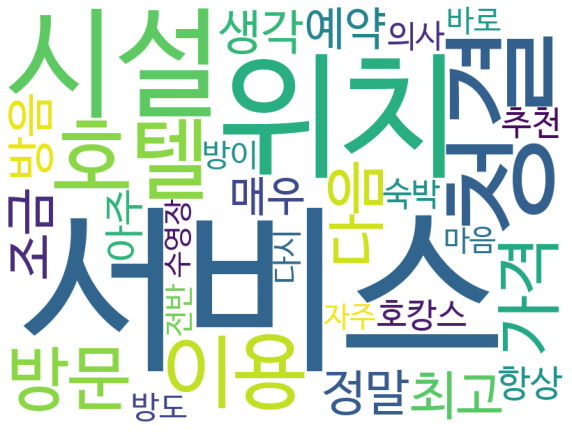

In [ ]:
# wordcloud 생성

wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
# 형태소 분석한 명사 리스트
noun_list = ['청결','서비스','가격','위치','시설','방음']

# countvectorizer 객체 생성
vectorizer = CountVectorizer()

# 명사 리스트를 문서-단어 행렬로 변환
X = vectorizer.fit_transform(noun_list)

# 단어-인덱스 매핑
print(vectorizer.vocabulary_)

{'청결': 5, '서비스': 2, '가격': 0, '위치': 4, '시설': 3, '방음': 1}


In [ ]:
hotel_nouns_dict = {}

df = pd.read_csv('./data/project/hotel_exlabel2.csv',encoding='cp949')
hotels = list(df['Hotel'])
content = list(df['Content'])


In [ ]:
hotel_freq_dict = {}
nouns_list = ['청결', '서비스', '가격', '위치', '시설', '방음']

for hotel in hotel_nouns_dict:
    nouns = hotel_nouns_dict[hotel]
    freq = [len(nouns.intersection(set([noun]))) for noun in nouns_list]
    hotel_freq_dict[hotel] = dict(zip(nouns_list, freq))

In [ ]:
for hotel in hotel_freq_dict:
    print(hotel)
    freq_dict = hotel_freq_dict[hotel]
    for noun in freq_dict:
        freq = freq_dict[noun]
        print(noun, freq)

호텔 크레센도 서울
수 1
다음 0
한눈 0
이용 1
카페 0
도보 0
방음 0
연발 0
방 1
테 0
청결 0
혼자 0
밤 0
분 0
넘 0
숙박 0
서비스 1
응대 0
크기 0
룸 0
번 0
의향 0
여행 0
야경 0
가로수길 0
감탄사 0
매력 0
필요 1
안 0
방문 1
남자친구 0
건물 0
감각 0
시설 1
추천 0
탑 0
친구 0
세번 0
대 0
감성 0
로프트 0
더블 0
것 1
실속 0
생각 0
위치 1
분이 1
거 0
사이즈 0
루프 0
앞 0
도착 0
곳 0
만족 0
내외로 0
지하 0
일본 0
낮 0
호텔 1
제품 0
신사역 0
편 1
잠옷 0
글래드 강남 코엑스센터
수 1
다음 1
한눈 0
이용 1
카페 0
도보 0
방음 1
연발 0
방 1
테 0
청결 1
혼자 0
밤 0
분 0
넘 0
숙박 0
서비스 1
응대 0
크기 0
룸 0
번 0
의향 0
여행 1
야경 0
가로수길 0
감탄사 0
매력 0
필요 0
안 0
방문 1
남자친구 0
건물 0
감각 0
시설 1
추천 0
탑 0
친구 0
세번 0
대 0
감성 0
로프트 0
더블 0
것 1
실속 0
생각 0
위치 1
분이 0
거 0
사이즈 0
루프 0
앞 0
도착 0
곳 1
만족 1
내외로 0
지하 1
일본 0
낮 0
호텔 1
제품 0
신사역 0
편 1
잠옷 0
호텔 리베라
수 1
다음 1
한눈 0
이용 1
카페 0
도보 0
방음 1
연발 0
방 1
테 0
청결 1
혼자 0
밤 0
분 1
넘 0
숙박 1
서비스 1
응대 0
크기 0
룸 0
번 0
의향 1
여행 0
야경 0
가로수길 0
감탄사 0
매력 0
필요 0
안 0
방문 1
남자친구 0
건물 0
감각 0
시설 1
추천 0
탑 0
친구 0
세번 0
대 0
감성 0
로프트 0
더블 0
것 1
실속 0
생각 1
위치 1
분이 0
거 0
사이즈 0
루프 0
앞 0
도착 0
곳 1
만족 1
내외로 0
지하 0
일본 0
낮 0
호텔 1
제품 1
신사역 0
편 0
잠옷 0
AC 호텔 바이 메리어트 서울 강남
수 1
다음 1
한눈 0
이용 0
카페 0
도

In [ ]:
# 단어 수를 저장할 빈 딕셔너리 생성
word_count_dict = {}

# 모든 호텔의 단어 수를 계산
for hotel in hotel_freq_dict:
    freq_dict = hotel_freq_dict[hotel]
    for word in freq_dict:
        if word in word_count_dict:
            word_count_dict[word] += freq_dict[word]
        else:
            word_count_dict[word] = freq_dict[word]

# 결과 출력
for word in word_count_dict:
    print(f"{word}: {word_count_dict[word]}")

청결: 51
서비스: 52
가격: 35
위치: 52
시설: 53
방음: 23


In [ ]:
nouns_list = list(hotel_nouns_dict[hotel])

for hotel in hotel_nouns_dict:
    nouns_list = list(hotel_nouns_dict[hotel])
    freq_dict = {}
    for noun in nouns_list:
        freq_dict[noun] = nouns_list.count(noun)
    hotel_freq_dict[hotel] = freq_dict

In [ ]:
for hotel in hotel_nouns_dict:
    nouns = hotel_nouns_dict[hotel]
    freq_dict = {}
    for noun in nouns:
        freq_dict[noun] = list(nouns).count(noun)
    hotel_freq_dict[hotel] = freq_dict

In [ ]:
for hotel in hotel_nouns_dict:
    nouns = hotel_nouns_dict[hotel]
    freq_dict = {}
    for noun in nouns_list:
        freq_dict[noun] = sum([1 for word in nouns if word == noun])
    hotel_freq_dict[hotel] = freq_dict

In [ ]:
for hotel, freq_dict in hotel_freq_dict.items():
    print(hotel, freq_dict)

호텔 크레센도 서울 {'수': 1, '다음': 0, '한눈': 0, '이용': 1, '카페': 0, '도보': 0, '방음': 0, '연발': 0, '방': 1, '테': 0, '청결': 0, '혼자': 0, '밤': 0, '분': 0, '넘': 0, '숙박': 0, '서비스': 1, '응대': 0, '크기': 0, '룸': 0, '번': 0, '의향': 0, '여행': 0, '야경': 0, '가로수길': 0, '감탄사': 0, '매력': 0, '필요': 1, '안': 0, '방문': 1, '남자친구': 0, '건물': 0, '감각': 0, '시설': 1, '추천': 0, '탑': 0, '친구': 0, '세번': 0, '대': 0, '감성': 0, '로프트': 0, '더블': 0, '것': 1, '실속': 0, '생각': 0, '위치': 1, '분이': 1, '거': 0, '사이즈': 0, '루프': 0, '앞': 0, '도착': 0, '곳': 0, '만족': 0, '내외로': 0, '지하': 0, '일본': 0, '낮': 0, '호텔': 1, '제품': 0, '신사역': 0, '편': 1, '잠옷': 0}
글래드 강남 코엑스센터 {'수': 1, '다음': 1, '한눈': 0, '이용': 1, '카페': 0, '도보': 0, '방음': 1, '연발': 0, '방': 1, '테': 0, '청결': 1, '혼자': 0, '밤': 0, '분': 0, '넘': 0, '숙박': 0, '서비스': 1, '응대': 0, '크기': 0, '룸': 0, '번': 0, '의향': 0, '여행': 1, '야경': 0, '가로수길': 0, '감탄사': 0, '매력': 0, '필요': 0, '안': 0, '방문': 1, '남자친구': 0, '건물': 0, '감각': 0, '시설': 1, '추천': 0, '탑': 0, '친구': 0, '세번': 0, '대': 0, '감성': 0, '로프트': 0, '더블': 0, '것': 1, '실속': 0, '생각': 0, '위치': 1, '분이':

In [ ]:
import konlpy.tag

komoran = konlpy.tag.Komoran()
hotel_nouns_dict = {}

for hotel in hotels:
    noun_list = []
    for content in df[df['Hotel']==hotel]['Content']:
        nouns = komoran.nouns(content)  # 댓글에서 명사 추출
        noun_list += nouns
    hotel_nouns_dict[hotel] = set(noun_list)  # set으로 중복 제거 후 딕셔너리에 추가

for hotel, nouns in hotel_nouns_dict.items():
    print(hotel, ':', ', '.join(nouns))

호텔 크레센도 서울 : 수, 이용, 실내, 계절, 방, 좋아서, 가능, 부족, 허리, 맥도날드, 편안, 편의점, 시청, 건조, 서비스, 특가, 넷플릭스, 시설, 필요, 방문, 가격, 논현, 수압, 교체, 공간, 것, 위치, 전반, 분이, 비품, 예정, 아픔, 겨울, 때, 인근, 감, 환기, 매트리스, 출장, 호텔, 옷걸이, 편, 가운
글래드 강남 코엑스센터 : 예약, 편리, 수, 이용, 지하철, 다음, 방음, 대비, 인접, 레, 레이, 유틸리티, 사이, 의사, 등, 좋아서, 방, 외국인, 구매, 쇼핑, 청결, 면도기, 신속, 숫자, 시, 서비스, 엘, 접근성, 추세, 밥집, 장소, 천원, 여행, 칫솔, 시설, 방문, 백화점, 가격, 방기, 인, 쪽, 장, 아웃, 이해, 강화, 교통, 입구, 것, 위치, 복도, 공기, 먼지, 비, 때, 인근, 곳, 비도, 만족, 지하, 향기, 터, 패드, 호텔, 삼성역, 신라, 베이, 편, 의견
호텔 리베라 : 만큼, 수, 차로, 대비, 의사, 방, 이용한, 편안, 아이, 장이, 타일, 노후, 유료, 숙박, 대로, 장점, 롯데, 것, 위치, 배정, 하지, 처음, 불편, 편리, 성급, 이용, 점, 치약, 욕, 흔적, 분, 시설, 가족, 방문, 리베라, 인, 관계, 생각, 공간, 때, 회사, 호텔, 애기, 직장, 만족도, 충전기, 반신, 잠, 청결, 동반, 투숙, 외관, 수차례, 교통, 공기, 최고, 미끄럼, 곳, 청담, 출장, 제품, 세월, 티크, 다음, 방음, 물, 옷, 방지, 시, 서비스, 의향, 칫솔, 이번, 가격, 후기, 안전, 엔, 배려, 타워, 방도, 비, 만족, 드, 내부, 리라
AC 호텔 바이 메리어트 서울 강남 : 수, 치역, 방, 위, 크기, 라운지, 마음, 매력, 안, 시스템, 금연, 역삼역, 연락, 남성, 어려움, 것, 일반, 위치, 불편, 빵, 인기, 편리, 연결, 파리, 밤, 스타벅스, 여성, 벽, 시설, 필요, 방문, 추천, 밖, 탑, 소품, 기념일, 생각, 칵테일, 제공, 메, 호텔, 모던, 사우나, 

In [ ]:
for hotel, nouns in hotel_nouns_dict.items():
    print(hotel)
    print(nouns)

호텔 크레센도 서울
['논현', '출장', '가격', '호텔', '서비스', '서비스', '편의점', '맥도날드', '인근', '위치', '넷플릭스', '시청', '이용', '예정', '공간', '시설', '비품', '서비스', '분이', '서비스', '시설', '수압', '옷걸이', '부족', '것', '전반', '좋아서', '방문', '예정', '시설', '매트리스', '허리', '아픔', '가격', '편', '매트리스', '교체', '필요', '실내', '건조', '겨울', '가운', '계절', '감', '환기', '가능', '위치', '편안', '좋아서', '방', '수', '특가', '방문', '방문', '때']
글래드 강남 코엑스센터
['서비스', '향기', '가격', '비', '때', '만족', '호텔', '교통', '편리', '위치', '외국인', '곳', '엘', '레', '베이', '터', '수', '청결', '숫자', '대비', '편', '호텔', '위치', '위치', '백화점', '등', '쇼핑', '위치', '패드', '가격', '비도', '방문', '의사', '서비스', '구매', '서비스', '장', '위치', '지하', '유틸리티', '이용', '등', '강화', '호텔', '것', '지하철', '입구', '위치', '밥집', '등', '시설', '위치', '신라', '좋아서', '다음', '위치', '예약', '것', '의견', '만족', '장소', '접근성', '서비스', '위치', '여행', '서비스', '추세', '것', '이해', '삼성역', '인접', '교통', '편리', '호텔', '서비스', '칫솔', '면도기', '구매', '수', '방음', '방', '사이', '복도', '쪽', '레이', '서비스', '아웃', '서비스', '이용', '시', '서비스', '천원', '방기', '방음', '삼성역', '인근', '위치', '교통', '편리', '서비스', '인', '신속', '시설', '공기', '먼지', '호텔'

In [ ]:
hotel_freq_dict = {}
for hotel in hotel_nouns_dict:
    nouns = hotel_nouns_dict[hotel]
    freq_dict = {}
    for noun in nouns:
        count = 0
        for c in content:
            if noun in c:
                count += 1
        freq_dict[noun] = count
    hotel_freq_dict[hotel] = freq_dict

In [ ]:
# 문서-단어 행렬로부터 유사도 행렬 계산
similarity_matrix = cosine_similarity(X)

# 유사도 행렬 출력
print(similarity_matrix)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
corr = pd.DataFrame(X.todense(), columns=noun_list).corrwith(df['Hotel'])

corr

청결    NaN
서비스   NaN
가격    NaN
위치    NaN
시설    NaN
방음    NaN
dtype: float64

In [ ]:
recommendation_data = data[['Hotel','MovieID','Rating']].copy()

In [ ]:
recommendation_pivot = recommendation_data.pivot(index='Hotel', columns='noun_list', values='Rating')

NameError: ignored

In [ ]:
pd.DataFrame({
    'Hotel': ['호텔A', '호텔B', '호텔C', '호텔D'],
    'Nouns': ['청결', '서비스']